In [22]:
from captcha.image import ImageCaptcha
from matplotlib import pyplot as plt
import glob
import numpy as np
import random
import os
import string
from PIL import Image 
%matplotlib inline


In [6]:
#image = ImageCaptcha(fonts=['./font/AntykwaBold.ttf', './font/Candice.ttf', './font/VeraMono.ttf', './font/verdana.ttf'])
image = ImageCaptcha(fonts=['./font/AntykwaBold.ttf'])

In [220]:
char_map = string.ascii_uppercase+string.digits
for i in range(10):
    text = ''.join(random.sample(char_map, 4))
    print("the size of image ", i,np.array(image.generate_image(text)).shape)

the size of image  0 (60, 170, 3)
the size of image  1 (60, 162, 3)
the size of image  2 (60, 160, 3)
the size of image  3 (60, 160, 3)
the size of image  4 (60, 160, 3)
the size of image  5 (60, 160, 3)
the size of image  6 (60, 190, 3)
the size of image  7 (60, 187, 3)
the size of image  8 (60, 160, 3)
the size of image  9 (60, 160, 3)


In [280]:
# %%timeit
# X = []
# for i in range(1000):
#     text = ''.join(random.sample(char_map, 4))
#     img = np.array(image.generate_image(text).resize((100, 40)))
#     img_gray = np.mean(img, -1)
#     if not isinstance(X, np.ndarray):
#         X = img_gray[..., np.newaxis]
#     else:
#         X = np.concatenate((X, img_gray[..., np.newaxis]), axis=-1)
#     #灰度值求解
#     #np.sum(np.array([0.2989, 0.5870, 0.1140]) * img, axis=2)
#     if i % 100 == 0:
#         print("generating captcha " , i)

num_char = 4
num_images = 10000
width_images = 100
height_images = 40
num_charmap = 36
X = np.empty((height_images, width_images , num_images))
y = np.empty((num_charmap*num_char, num_images))
char_map = string.ascii_uppercase + string.digits

for i in range(num_images):
    text = ''.join(random.sample(char_map, num_char))
    img = np.array(image.generate_image(text).resize((width_images, height_images)))
    img_gray = np.mean(img, -1)
    X[:, :, i] = img_gray
    
    y_index = [ char_map.find(text[_i])+_i*num_charmap for _i in range(num_char)]
    y[y_index, i] = 1

    #灰度值求解
    #np.sum(np.array([0.2989, 0.5870, 0.1140]) * img, axis=2)
    if i % (num_images/10) == 0:
        print("generating captcha " , i)

generating captcha  0
generating captcha  1000
generating captcha  2000
generating captcha  3000
generating captcha  4000
generating captcha  5000
generating captcha  6000
generating captcha  7000
generating captcha  8000
generating captcha  9000


In [293]:
y

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [279]:
char_map.find('9')

35

In [81]:
np.array(image.generate_image(text), ndmin=4).shape

(1, 60, 160, 3)

In [94]:
text = ''.join(random.sample(char_map, 4))
np.array(image.generate_image(text)).shape

(60, 160, 3)

In [270]:
y.shape

(140, 10000)

In [168]:
img = np.mean(img, -1)

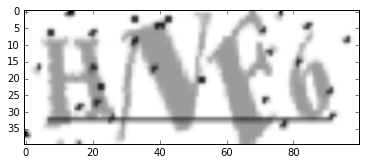

In [166]:
# %%timeit
# np.sum(np.array([0.2989, 0.5870, 0.1140]) * img, axis=2)
img = np.array(image.generate_image(text).resize((100, 40)))
plt.imshow(np.sum(np.array([0.2989, 0.5870, 0.1140]) * img, axis=2), cmap='gray')


In [194]:
img2 = np.concatenate((img.reshape((40, 100, 1)), img.reshape((40, 100, 1))), axis =2)

In [196]:
np.concatenate((img2, img.reshape((40, 100, 1))), axis =2).shape

(40, 100, 3)

In [205]:
X = np.empty((40, 100, 1))

In [207]:
np.concatenate((img2, X), axis =2).shape

(40, 100, 3)